In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
npts = 256
xmin = 0
xmax = 256
dx = (xmax - xmin)/npts

dbl_npts = 2*npts
dbl_xmax = 2*xmax
dbl_xmin = 2*xmin


def gen_xs(xmin = xmin, xmax = xmax, npts = npts):
    
    dx = (xmax - xmin)/npts
    
    if npts % 2: 
        xs = np.arange(-(npts-1)//2, (npts-1)//2+1)*dx
    
    else: 
        xs = np.arange(-npts//2, npts//2)*dx
    
    return xs

xs = gen_xs()
X,Y = np.meshgrid(xs,xs)

In [16]:
# Generate our mask and boundary conditions
def get_bc_pt_charge(n):
    
    bc = np.zeros([n,n])
    mask = np.ones_like(bc, dtype = bool)
    
    # Set zero boundary conditions
    bc[:,-1] = 0
    bc[:,0] = 0
    bc[0,:] = 0
    bc[-1,:] = 0
    bc[:,1] = 0
    bc[1,:] = 0
    
    # Set mask
    mask[:,-1] = False
    mask[:,0] = False
    mask[0,:] = False
    mask[-1, :] = False
    mask[:,1] = False
    mask[1,:] = False 
    
    # Set value at origin
    bc[n//2, n//2] = 1
    mask[n//2,n//2] = False
    
    return bc, mask

In [18]:
bc, mask = get_bc_pt_charge(npts)

In [40]:
# Generate kernel
def get_r(xmin = xmin, xmax = xmax, npts = npts):
    xs = gen_xs(xmin, xmax, npts)
    X,Y = np.meshgrid(xs,xs)
    return np.sqrt(X**2 + Y**2)

def get_kernel(r, dx = dx, npts = npts):
    
    r[npts//2, npts//2] = 1
    # Potential goes like -ln(r)/(2pi)
    kern = 1.4*np.log(r)/np.pi/2
    
    # Set it so that potential goes to zero on boundaries
    kern = kern - kern[npts-1,npts-1] 
    
    # Potential at center is average of its neighbors 
    kern[npts//2, npts//2] = kern[npts//2+1,npts//2]
    
    return kern
    
    

In [41]:
r = get_r()
r[npts//2, npts//2]
kern = get_kernel(r)

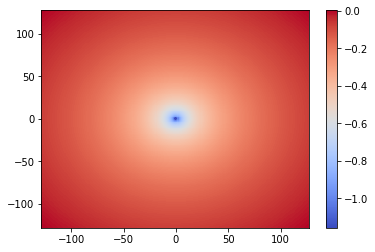

In [42]:
plt.pcolormesh(X,Y, kern, shading = 'auto', cmap = 'coolwarm')
plt.colorbar()
plt.show()

The above it the potential that I get. 